In [42]:
import numpy as np
from matplotlib import pyplot as plt
from skimage.io import imread
from PIL import Image
import os
from random import shuffle

# !pip install pdf2image
from pdf2image import convert_from_path, convert_from_bytes
dir_pdfs = '../../dataset_papers/CVPR2019/papers/'

## Prueba vieja

In [32]:
attention_image = convert_from_bytes(open('./attention_is_all_you_need.pdf', 'rb').read())
print(attention_image[2].size)
print(np.array(attention_image[2]).shape)

(1700, 2200)
(2200, 1700, 3)


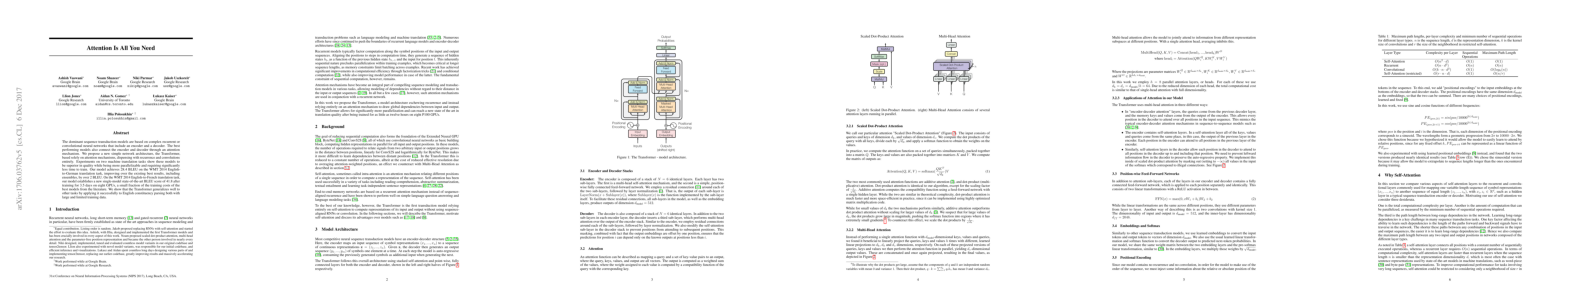

In [27]:
fig, axs = plt.subplots(1,6,figsize=(20, 25))
for i, ax in enumerate(axs):
    ax.imshow(attention_image[i])
    ax.axis('off')
plt.show()

## Pruebas con muchos pdfs

In [7]:
# Lista con archivos pdf
pdfs = os.listdir(dir_pdfs)
pdfs[-1]

'Gu_Mask-Guided_Portrait_Editing_With_Conditional_GANs_CVPR_2019_paper.pdf'

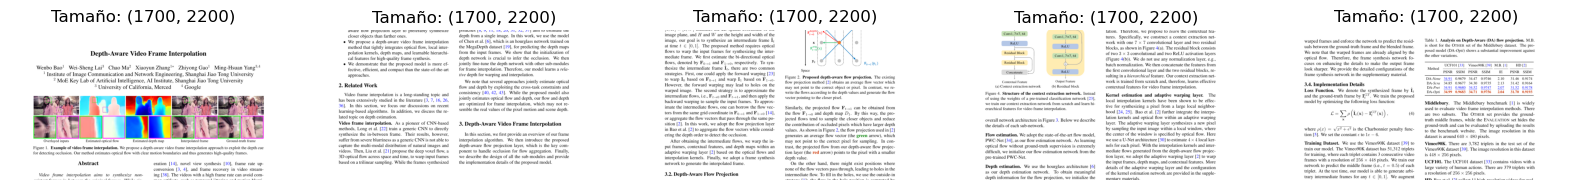

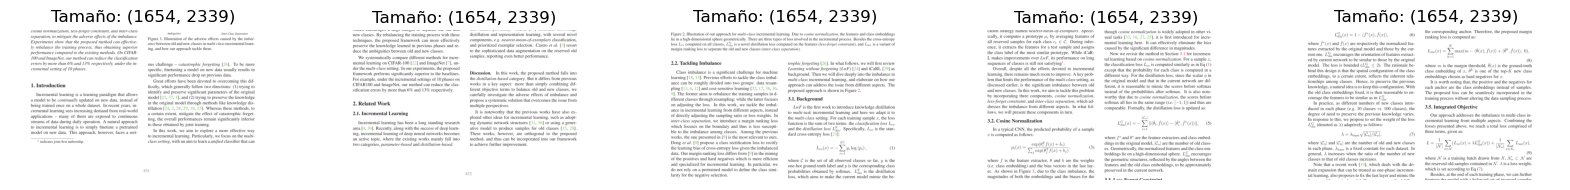

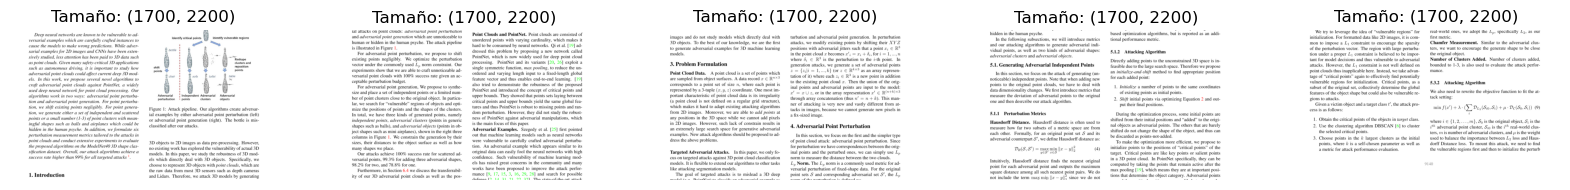

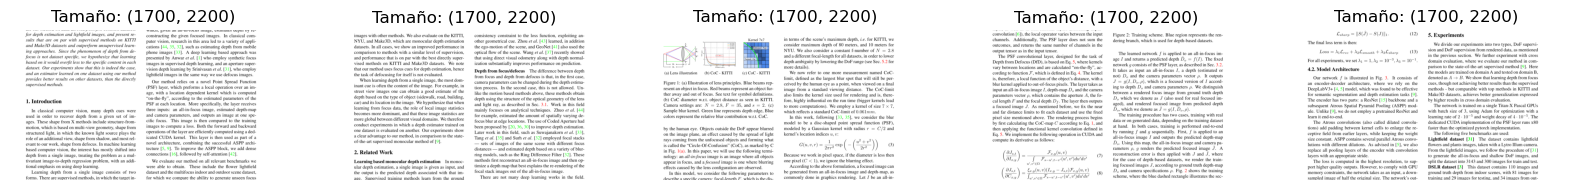

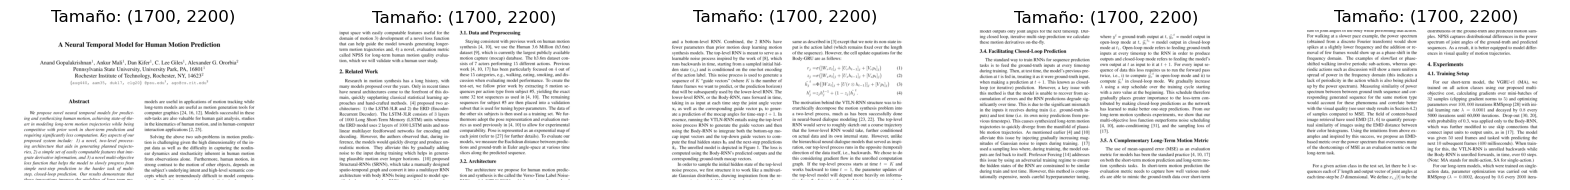

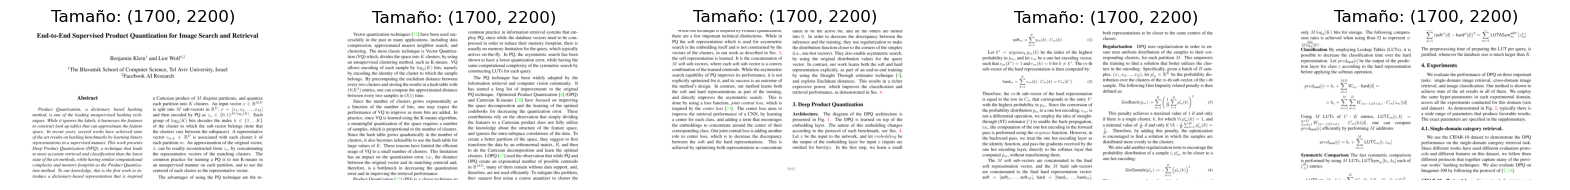

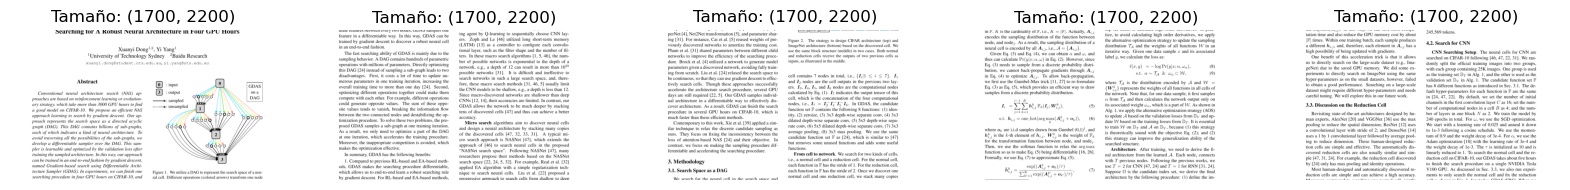

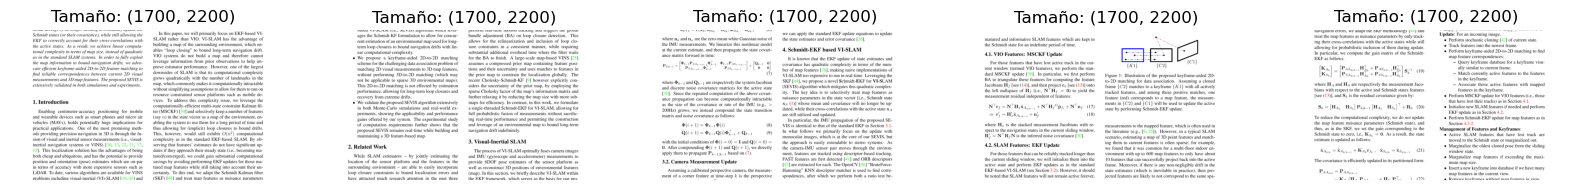

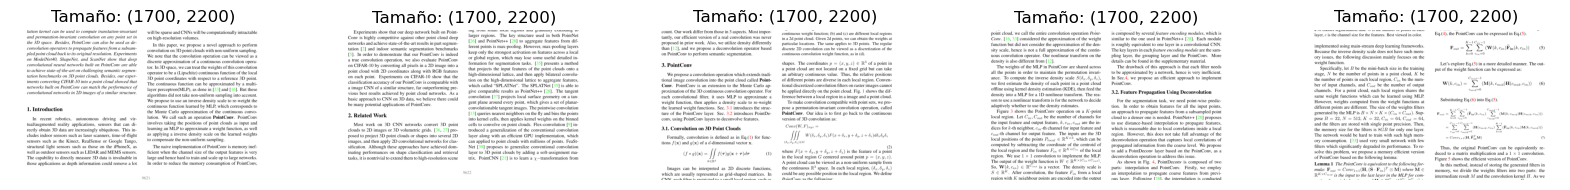

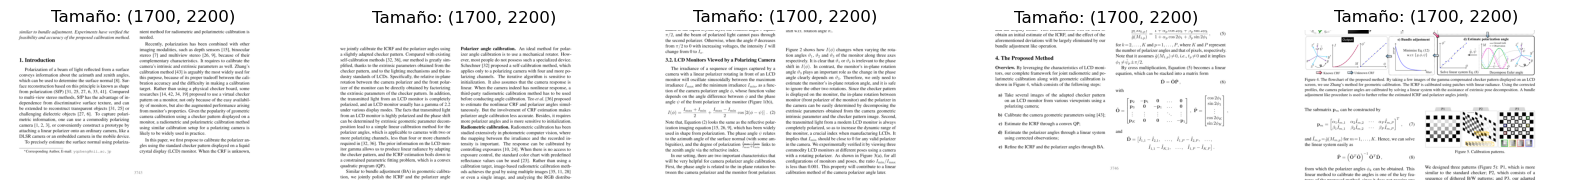

In [35]:
h_size, v_size = 1600, 900

for j in np.random.randint(0,len(pdfs),10):

    pdf_image = convert_from_path(dir_pdfs+pdfs[j])

    image_page_shape = pdf_image[0].size

    fig, axs = plt.subplots(1,5,figsize=(20, 25))
    for i, ax in enumerate(axs):

        # Random row and columns indexes
        rand_init_v = np.random.randint(0,image_page_shape[1]-v_size)
        rand_init_h = np.random.randint(0,image_page_shape[0]-h_size)

        image_page = np.array(pdf_image[i])[rand_init_v:rand_init_v+v_size, rand_init_h:rand_init_h+h_size]
        ax.set_title(f'Tamaño: {image_page_shape}')
        ax.imshow(image_page)
        ax.axis('off')
    plt.show()

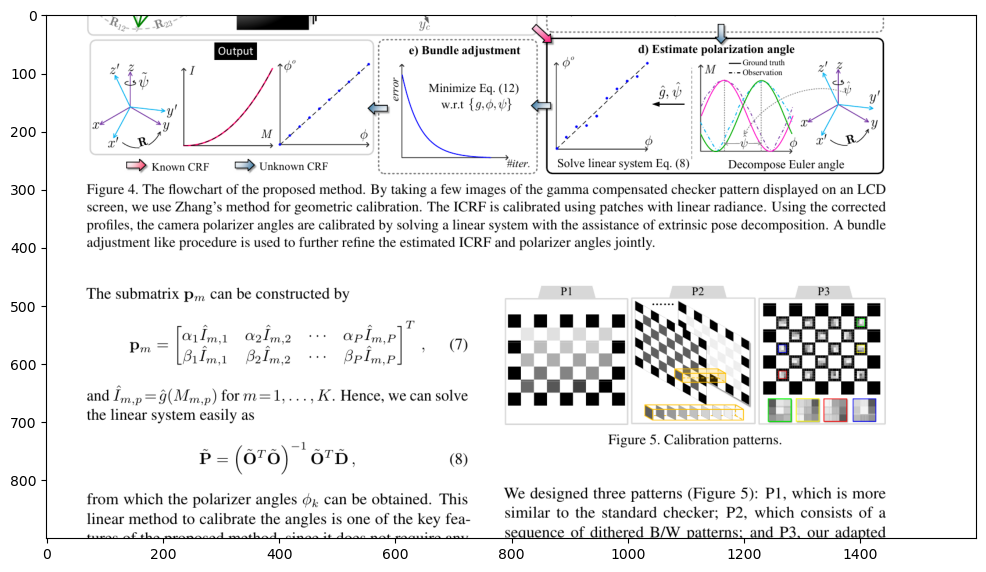

In [36]:
plt.figure(figsize=(12,18))
plt.imshow(image_page)
plt.show()

## Generar dataset 1600x900

In [43]:
# Carpeta del nuevo dataset
dir_imgs = '../../dataset_papers/CVPR2019/CVPR2019_images/'

if not os.path.exists(dir_imgs):
    os.mkdir(dir_imgs)

# Fijar resolución 1600x900
h_size, v_size = 1600, 900

In [48]:
for pdf_paper in pdfs:

    file_name = pdf_paper.split('.')[0]
    image_name = file_name + '.png'

    # Cargar pdf y entreverarlo (no agarrar siempre inicio y fin)
    pdf_images = convert_from_path(dir_pdfs+pdf_paper)
    shuffle(pdf_images)
    # Elegir la primer imagen luego del shuffle y pasarlo a numpy
    pdf_image = np.array(pdf_images[0])

    image_page_shape = pdf_image.shape

    # Indices random para filas y columnas
    rand_init_v = np.random.randint(0,image_page_shape[0]-v_size)
    rand_init_h = np.random.randint(0,image_page_shape[1]-h_size)
    # Cropping
    image_page = pdf_image[rand_init_v:rand_init_v+v_size, rand_init_h:rand_init_h+h_size]

    # Saving
    im = Image.fromarray(image_page)
    im.save(dir_imgs+image_name)

